# Cut the Volume in the middle and flip the right side

## Cut and Flip

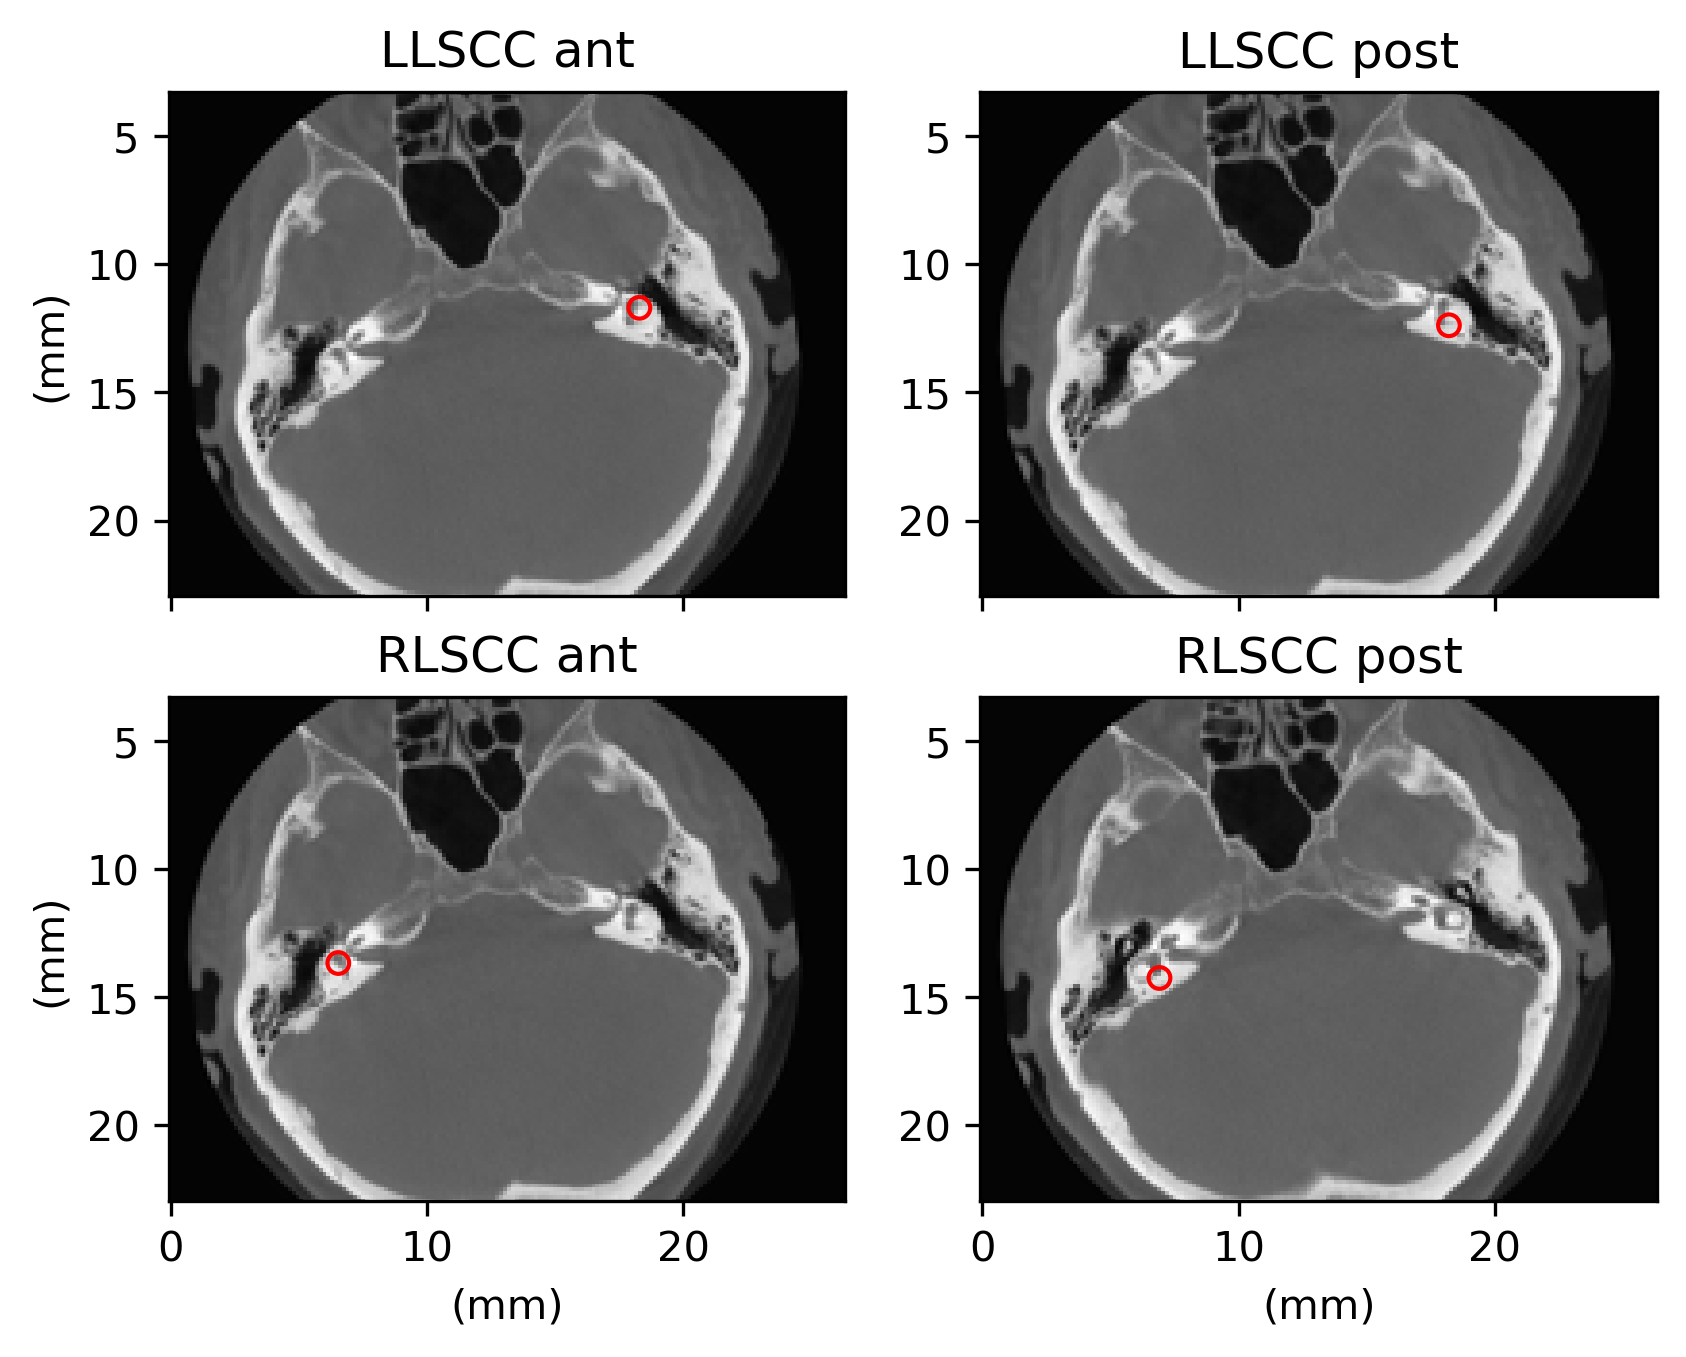

In [14]:
## Check the cropped results
import numpy as np
import importlib
import Functions.MyDataset as MyDataset
import Functions.Visualization as Visualization

pt_volume_path = "/Volumes/Shawn_HDD/PhD/Project/Date/augmentation_from_matlab/Rescaled/176_176_48_PD/AH_17617648_VolPts_2.mat"
# JH_reshape_vol_mat_path = "/Volumes/Shawn_SSD/PhD/Project/Date/augmentation_from_matlab/Val/Input/FA_17017030_AugVol_2.mat"
# JH_reshape_pts_mat_path = "/Volumes/Shawn_SSD/PhD/Project/Date/augmentation_from_matlab/Val/Output/FA_17017030_AugPts_2.mat"

pixel_space = [0.15, 0.15, 0.15]

importlib.reload(MyDataset)

JH_aug_volume, JH_aug_pts, _ = MyDataset.load_mat_data(pt_volume_path)

Visualization.show_pts(JH_aug_volume, JH_aug_pts, pixel_space)

In [15]:
import Functions.MyCrop as MyCrop

importlib.reload(MyCrop)

left_volume, left_points, right_volume, right_points, left_points_cut = MyCrop.cut_flip_volume(JH_aug_volume, JH_aug_pts)
flip_right_volume, flip_right_points = MyCrop.flip_volume(right_volume, right_points)

In [16]:
print("volume shape: ", JH_aug_volume.shape)
print("left volume shape: ", left_volume.shape)
print("right volume shape: ", right_volume.shape)

volume shape:  (176, 176, 48)
left volume shape:  (176, 88, 48)
right volume shape:  (176, 88, 48)


In [17]:
left_points_map_back = np.copy(left_points)
left_points_map_back[:, 0] = left_points_map_back[:, 0] + left_points_cut

print("Original Points: ", JH_aug_pts)
print("Locate back: ", np.append(left_points_map_back, right_points, axis=0))

Original Points:  [[121.95330758  77.98147575  30.32479117]
 [121.40280766  82.53319025  30.03018894]
 [ 43.60553563  91.10873752  30.27767526]
 [ 46.08764491  94.99522565  29.50030862]]
Locate back:  [[121.95330758  77.98147575  30.32479117]
 [121.40280766  82.53319025  30.03018894]
 [ 43.60553563  91.10873752  30.27767526]
 [ 46.08764491  94.99522565  29.50030862]]


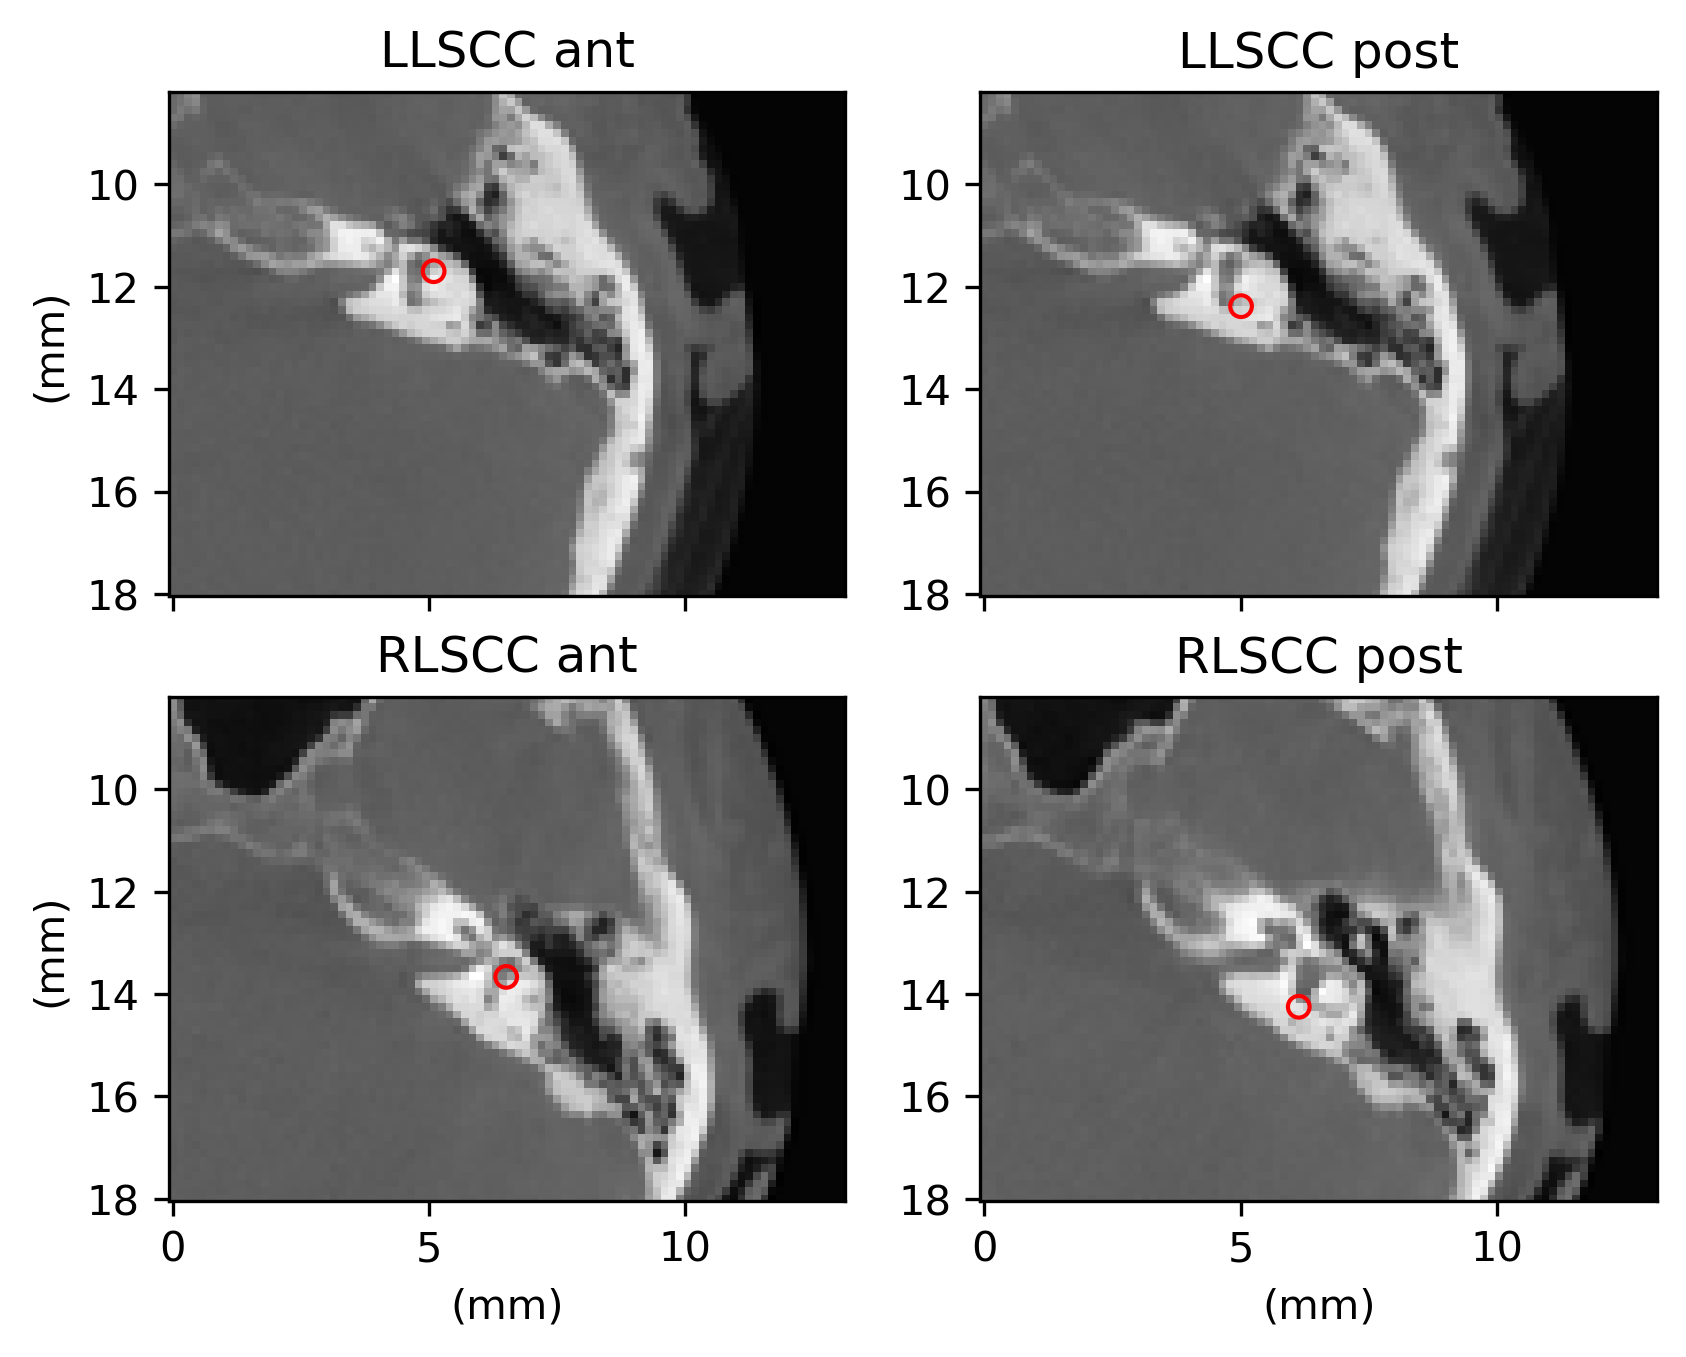

In [18]:
importlib.reload(Visualization)
import time
from IPython.display import display, clear_output

pixel_space = [0.15, 0.15, 0.15]

Visualization.show_two_landmarks(left_volume, left_points, flip_right_volume, flip_right_points, pixel_space)

In [ ]:
import numpy as np
import Functions.MyDataset as MyDataset

pixel_space = [0.15, 0.15, 0.15]
size_str = "17617648_PD"
dir_path = "F:/Data/original_augmentation_data/"
save_volumes_dir = "F:/Data/half_volume/" + size_str + "_HF/volumes/"
save_points_dir = "F:/Data/half_volume/" + size_str + "_HF/points/"
save_length_dir = "F:/Data/half_volume/" + size_str + "_HF/length_res/"
pat_names = MyDataset.get_pat_names()

In [ ]:
for pat_name in pat_names:
    for aug_id in range(1, 51):
        # such as: ""
        file_path = dir_path + pat_name + "_aug_" + str(aug_id) + ".mat"
        print("load file: ", file_path)
        zoomed_aug_volume, zoomed_aug_pts, zoomed_res = MyDataset.load_mat_data(file_path, with_res=True)
        clear_output(wait=True)
        print("divide volume for: ", file_path)
        left_volume, left_points, right_volume, right_points, left_cut_length = MyCrop.cut_flip_volume(zoomed_aug_volume, zoomed_aug_pts)
        flip_right_volume, flip_right_points = MyCrop.flip_volume(right_volume, right_points)
        Visualization.show_two_landmarks(left_volume, left_points, flip_right_volume, flip_right_points, pixel_space)
        print("save the divided volumes")
        np.save(save_volumes_dir + pat_name + "_" + size_str + "_volume_divided_left.npy", left_volume)
        np.save(save_volumes_dir + pat_name + "_" + size_str + "_volume_divided_right.npy", flip_right_volume)
        np.save(save_points_dir + pat_name + "_" + size_str + "_pts_divided_left.npy", left_points)
        np.save(save_points_dir + pat_name + "_" + size_str + "_pts_divided_right.npy", flip_right_points)
        np.save(save_length_dir + pat_name + "_" + size_str + "_res.npy", zoomed_res)
        np.save(save_length_dir + pat_name + "_" + size_str + "_length_divided_left.npy", left_cut_length)
        print("Finish dividing: " + file_path)

In [ ]:
# Combine cropped volumes
divided_volumes = []
divided_points = []
divided_length = []
res_array = []

for pat_name in pat_names:
    for aug_id in range(1, 51):
        # such as: ""
        #          ""
        #          ""
        #          ""
        print("**************" + pat_name + "__" + str(aug_id) + "***************")
        divided_volume_left_path = save_volumes_dir + pat_name + "_" + size_str + "_volume_divided_left.npy"
        divided_volume_right_path = save_volumes_dir + pat_name + "_" + size_str + "_volume_divided_right.npy"
        divided_points_left_path = save_points_dir + pat_name + "_" + size_str + "_pts_divided_left.npy"
        divided_points_right_path = save_points_dir + pat_name + "_" + size_str + "_pts_divided_right.npy"
        divided_length_left_path = save_length_dir + pat_name + "_" + size_str + "_length_divided_left.npy"
        res_path = save_length_dir + pat_name + "_" + size_str + "_res.npy"
        divided_volume_left = np.load(divided_volume_left_path)
        divided_volume_right = np.load(divided_volume_right_path)
        divided_points_left = np.load(divided_points_left_path)
        divided_length_left = np.load(divided_length_left_path)
        divided_points_right = np.load(divided_points_right_path)
        res = np.load(res_path)
        divided_volumes.append(divided_volume_left)
        divided_volumes.append(divided_volume_right)
        divided_points.append(divided_points_left)
        divided_points.append(divided_points_right)
        divided_length.append(divided_length_left)
        res_array.append(res)

print(len(divided_volumes))
print(len(divided_points))
print(len(divided_length))
print(len(res_array))

In [ ]:
divided_volumes = np.asarray(divided_volumes).reshape((2000, 100, 100, 100, 1))
divided_points = np.asarray(divided_points).reshape((2000, 2, 3))
divided_length = np.asarray(divided_length).reshape((2000, 2, 3))
np.save("F:/Data/half_volume/divided_volumes_" + size_str + ".npy", divided_volumes)
np.save("F:/Data/half_volume/divided_points_" + size_str + ".npy", divided_points)
np.save("F:/Data/half_volume/divided_length_" + size_str + ".npy", divided_length)
np.save("F:/Data/half_volume/res_array_" + size_str + ".npy", res_array)

## Centre point

## Check the new dataset